# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
list(lat_lngs)

Number of cities in the list: 604


[]

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    city_weather = requests.get(city_url).json()
    try:
   # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | yarmouth
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | shimoda
Processing Record 6 of Set 1 | cayenne
Processing Record 7 of Set 1 | sinnamary
Processing Record 8 of Set 1 | omsukchan
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | makakilo city
Processing Record 16 of Set 1 | grand gaube
Processing Record 17 of Set 1 | azrow
City not found. Skipping...
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | prattville
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | puerto escondido
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,0.32,83,92,4.53,US,1674556380
1,yarmouth,41.7057,-70.2286,1.09,81,0,8.94,US,1674556382
2,bredasdorp,-34.5322,20.0403,18.23,58,63,8.45,ZA,1674556383
3,iqaluit,63.7506,-68.5145,-26.15,76,75,4.63,CA,1674556194
4,shimoda,34.6667,138.9500,4.50,80,75,11.90,JP,1674556386


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,0.32,83,92,4.53,US,1674556380
1,yarmouth,41.7057,-70.2286,1.09,81,0,8.94,US,1674556382
2,bredasdorp,-34.5322,20.0403,18.23,58,63,8.45,ZA,1674556383
3,iqaluit,63.7506,-68.5145,-26.15,76,75,4.63,CA,1674556194
4,shimoda,34.6667,138.9500,4.50,80,75,11.90,JP,1674556386


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

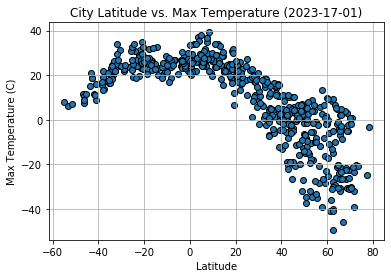

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-17-01)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

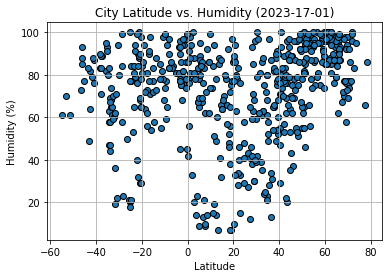

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black')


# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-17-01)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

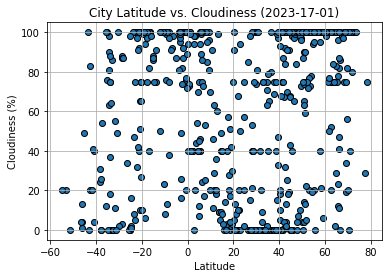

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-17-01)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

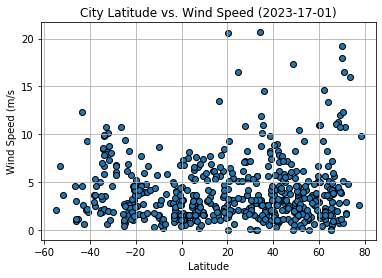

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-17-01)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'],city_data_df['Max Temp'])

# Get regression values
regress_values = city_data_df['Lat'] * slope + intercept
print(regress_values)

City_ID
0       0.745749
1       1.119025
2      32.936703
3      -8.081354
4       4.056732
         ...    
548     4.133273
549    19.947938
550    15.992863
551    24.915873
552    -2.989467
Name: Lat, Length: 553, dtype: float64


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,0.32,83,92,4.53,US,1674556380
1,yarmouth,41.7057,-70.2286,1.09,81,0,8.94,US,1674556382
3,iqaluit,63.7506,-68.5145,-26.15,76,75,4.63,CA,1674556194
4,shimoda,34.6667,138.9500,4.50,80,75,11.90,JP,1674556386
5,cayenne,4.9333,-52.3333,25.02,78,75,3.60,GF,1674556138


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,18.23,58,63,8.45,ZA,1674556383
9,avarua,-21.2078,-159.7750,23.03,100,92,1.03,CK,1674556393
10,new norfolk,-42.7826,147.0587,18.73,64,83,0.56,AU,1674556394
12,atuona,-9.8000,-139.0333,25.96,74,8,8.61,PF,1674556397
13,rikitea,-23.1203,-134.9692,25.65,79,5,8.23,PF,1674556398


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6888954296538388


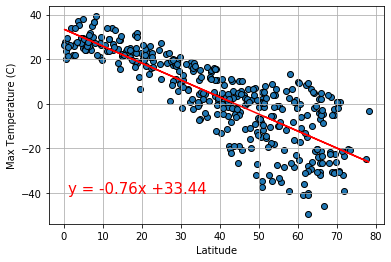

In [17]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
northern_regress_values = northern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],edgecolors='black')
plt.plot(northern_hemi_df['Lat'],northern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.annotate(line_eq,(1,-40),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

The r-value is: 0.34466659336606226


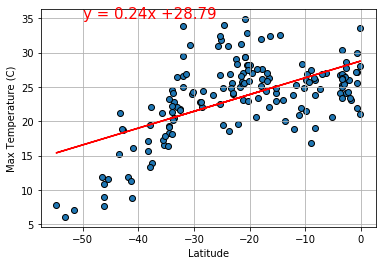

In [18]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
southern_regress_values = southern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],edgecolors='black')
plt.plot(southern_hemi_df['Lat'],southern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** 
The linear regression shows that there is a relationship between the Max Temp and Latitudes, highlighting that the further away from the equator (0) you are, the colder the max temperature gets.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17245705574905515


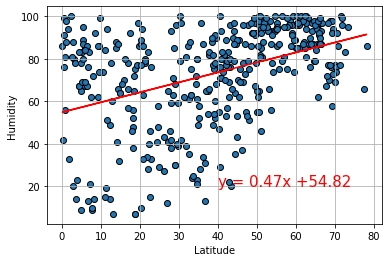

In [19]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
northern_regress_values = northern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],edgecolors='black')
plt.plot(northern_hemi_df['Lat'],northern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

The r-value is: 0.03754115414304258


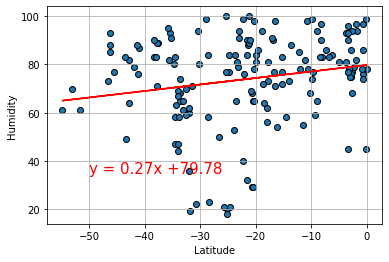

In [20]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
southern_regress_values = southern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],edgecolors='black')
plt.plot(southern_hemi_df['Lat'],southern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** 
The r-values here are both quite close to zero, indicating there is not much correlation between Humidity and Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07428449444210312


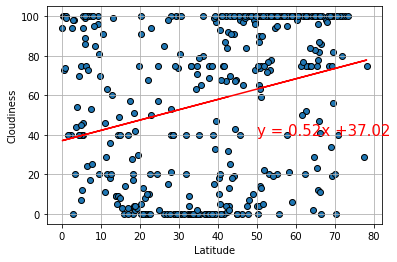

In [21]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
northern_regress_values = northern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],edgecolors='black')
plt.plot(northern_hemi_df['Lat'],northern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.annotate(line_eq,(50,40),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

The r-value is: 0.2435361582569737


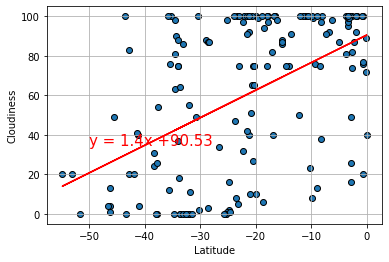

In [22]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
southern_regress_values = southern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],edgecolors='black')
plt.plot(southern_hemi_df['Lat'],southern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** 
Again, the r-values here indicate little correlation between the cloudiness and latitude. This is also seen visually by looking at the linear regression lines.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006639641627827201


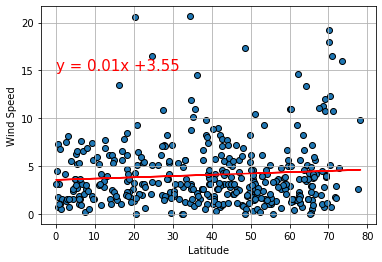

In [23]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
northern_regress_values = northern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],edgecolors='black')
plt.plot(northern_hemi_df['Lat'],northern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.annotate(line_eq,(0,15),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

The r-value is: 0.09064525315895973


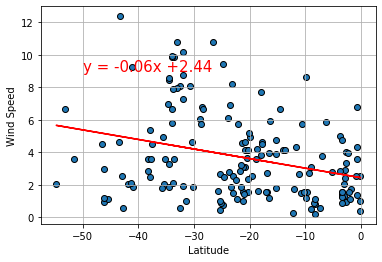

In [24]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
southern_regress_values = southern_hemi_df['Lat'] * slope + intercept

#work out equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],edgecolors='black')
plt.plot(southern_hemi_df['Lat'],southern_regress_values,color='red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.annotate(line_eq,(-50,9),fontsize=15,color="red")

# Show plot
print(f'The r-value is: {rvalue**2}')
plt.show()

**Discussion about the linear relationship:** Similarly, Wind Speed seems to have no direct correlation when compared against Latitude. 